In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df =  pd.read_csv('/home/arjun/Desktop/Datasets/diabetes.csv')
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes


# Data Visualisation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_number   390 non-null    int64 
 1   cholesterol      390 non-null    int64 
 2   glucose          390 non-null    int64 
 3   hdl_chol         390 non-null    int64 
 4   chol_hdl_ratio   390 non-null    object
 5   age              390 non-null    int64 
 6   gender           390 non-null    object
 7   height           390 non-null    int64 
 8   weight           390 non-null    int64 
 9   bmi              390 non-null    object
 10  systolic_bp      390 non-null    int64 
 11  diastolic_bp     390 non-null    int64 
 12  waist            390 non-null    int64 
 13  hip              390 non-null    int64 
 14  waist_hip_ratio  390 non-null    object
 15  diabetes         390 non-null    object
dtypes: int64(11), object(5)
memory usage: 48.9+ KB


In [4]:
df.describe()

,patient_number,cholesterol,glucose,hdl_chol,age,height,weight,systolic_bp,diastolic_bp,waist,hip
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,195.500000,207.230769,107.338462,50.266667,46.774359,65.951282,177.407692,137.133333,83.289744,37.869231,42.992308
std,112.727548,44.666005,53.798188,17.279069,16.435911,3.918867,40.407824,22.859528,13.498192,5.760947,5.664342
min,1.000000,78.000000,48.000000,12.000000,19.000000,52.000000,99.000000,90.000000,48.000000,26.000000,30.000000
25%,98.250000,179.000000,81.000000,38.000000,34.000000,63.000000,150.250000,122.000000,75.000000,33.000000,39.000000
50%,195.500000,203.000000,90.000000,46.000000,44.500000,66.000000,173.000000,136.000000,82.000000,37.000000,42.000000
75%,292.750000,229.000000,107.750000,59.000000,60.000000,69.000000,200.000000,148.000000,90.000000,41.000000,46.000000
max,390.000000,443.000000,385.000000,120.000000,92.000000,76.000000,325.000000,250.000000,124.000000,56.000000,64.000000


In [5]:
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes


In [6]:
df['diabetes'] = df['diabetes'].map({'No diabetes':0, 'Diabetes':1})
df['gender'] = df['gender'].map({'male':0, 'female':1})
df['waist_hip_ratio'] = df['waist_hip_ratio'].apply(lambda x:float('.'.join(x.split(','))))
df['bmi'] = df['bmi'].apply(lambda x:float('.'.join(x.split(','))))
df['chol_hdl_ratio'] = df['chol_hdl_ratio'].apply(lambda x:float('.'.join(x.split(','))))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_number   390 non-null    int64  
 1   cholesterol      390 non-null    int64  
 2   glucose          390 non-null    int64  
 3   hdl_chol         390 non-null    int64  
 4   chol_hdl_ratio   390 non-null    float64
 5   age              390 non-null    int64  
 6   gender           390 non-null    int64  
 7   height           390 non-null    int64  
 8   weight           390 non-null    int64  
 9   bmi              390 non-null    float64
 10  systolic_bp      390 non-null    int64  
 11  diastolic_bp     390 non-null    int64  
 12  waist            390 non-null    int64  
 13  hip              390 non-null    int64  
 14  waist_hip_ratio  390 non-null    float64
 15  diabetes         390 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 48.9 KB


In [8]:
df.tail()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
385,386,227,105,44,5.2,83,1,59,125,25.2,150,90,35,40,0.88,0
386,387,226,279,52,4.3,84,1,60,192,37.5,144,88,41,48,0.85,1
387,388,301,90,118,2.6,89,1,61,115,21.7,218,90,31,41,0.76,0
388,389,232,184,114,2.0,91,1,61,127,24.0,170,82,35,38,0.92,1
389,390,165,94,69,2.4,92,1,62,217,39.7,160,82,51,51,1.00,0


<Axes: >

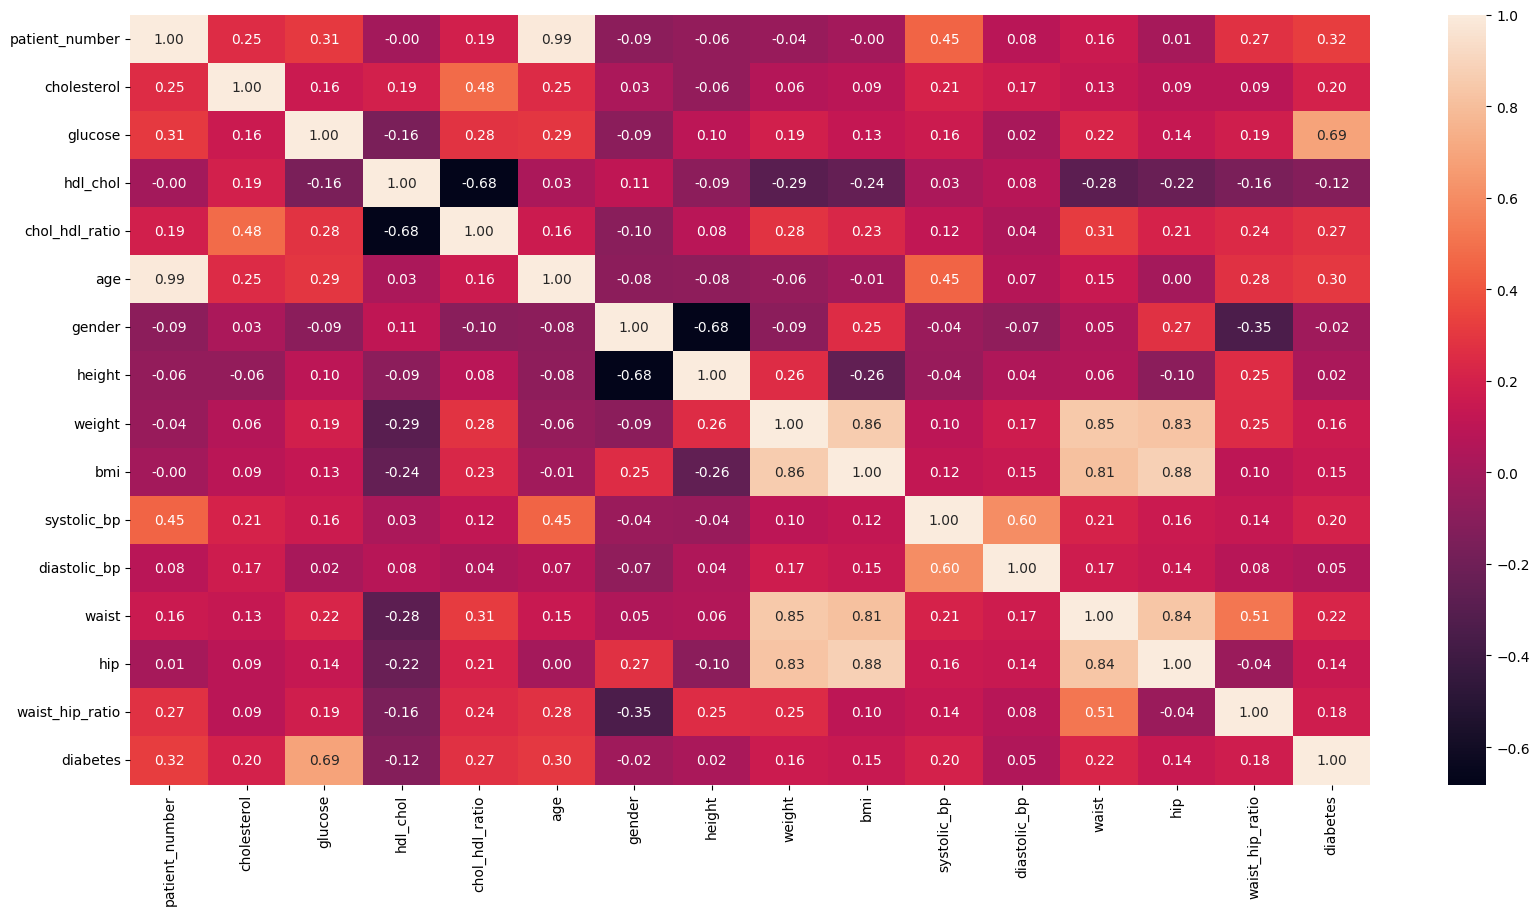

In [9]:
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)


In [10]:
pd.pivot_table(df, index = 'diabetes', values = df.columns)

,age,bmi,chol_hdl_ratio,cholesterol,diastolic_bp,gender,glucose,hdl_chol,height,hip,patient_number,systolic_bp,waist,waist_hip_ratio,weight
diabetes,,,,,,,,,,,,,,,
0,44.660606,28.367273,4.322727,203.345455,83.006061,0.587879,91.551515,51.172727,65.912121,42.645455,180.242424,135.200000,37.321212,0.875909,174.603030
1,58.400000,31.021667,5.635000,228.600000,84.850000,0.566667,194.166667,45.283333,66.166667,44.900000,279.416667,147.766667,40.883333,0.911500,192.833333


In [11]:
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,3.9,19,1,61,119,22.5,118,70,32,38,0.84,0
1,2,146,79,41,3.6,19,1,60,135,26.4,108,58,33,40,0.83,0
2,3,217,75,54,4.0,20,1,67,187,29.3,110,72,40,45,0.89,0
3,4,226,97,70,3.2,20,1,64,114,19.6,122,64,31,39,0.79,0
4,5,164,91,67,2.4,20,1,70,141,20.2,122,86,32,39,0.82,0


In [12]:
X = np.array(df[['chol_hdl_ratio', 'glucose', 'age', 'gender', 'weight', 'systolic_bp', 'waist_hip_ratio']])
y = np.array(df['diabetes'])
X.shape, y.shape

((390, 7), (390,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Here, the data is clean and seems to be ready to be used right away

# Models

### 1. Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=140)

model.fit(X_train,y_train)

print('Accuracy - Train:',model.score(X_train,y_train))
print('Accuracy - Test :',model.score(X_test,y_test))

Accuracy - Train: 0.9358974358974359
Accuracy - Test : 0.8974358974358975


### 2. KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

model.fit(X_train,y_train)

print('Accuracy - Train:',model.score(X_train,y_train))
print('Accuracy - Test :',model.score(X_test,y_test))

Accuracy - Train: 0.9423076923076923
Accuracy - Test : 0.8717948717948718


### 3. Naive Bayes

In [16]:

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

print('Accuracy - Train:',model.score(X_train,y_train))
print('Accuracy - Test :',model.score(X_test,y_test))

Accuracy - Train: 0.9294871794871795
Accuracy - Test : 0.8974358974358975


### 4. Decision Trees

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

print('Accuracy - Train:',model.score(X_train,y_train))
print('Accuracy - Test :',model.score(X_test,y_test))

Accuracy - Train: 1.0
Accuracy - Test : 0.8205128205128205


### 5. Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

print('Accuracy - Train:',model.score(X_train,y_train))
print('Accuracy - Test :',model.score(X_test,y_test))

Accuracy - Train: 1.0
Accuracy - Test : 0.8717948717948718


### 6. Extremely Randomised Trees -> Extra Trees

In [19]:
from sklearn.ensemble import ExtraTreesClassifier 
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

print('Accuracy - Train:',model.score(X_train,y_train))
print('Accuracy - Test :',model.score(X_test,y_test))

Accuracy - Train: 1.0
Accuracy - Test : 0.8974358974358975


### 7. XGBoost

In [20]:
# ! pip install xgboost

In [26]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)

print('Accuracy - Train:',model.score(X_train,y_train))
print('Accuracy - Test :',model.score(X_test,y_test))

Accuracy - Train: 1.0
Accuracy - Test : 0.8461538461538461


### 8. MLP 

In [22]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_train,y_train)

print('Accuracy - Train:',model.score(X_train,y_train))
print('Accuracy - Test :',model.score(X_test,y_test))

Accuracy - Train: 0.9326923076923077
Accuracy - Test : 0.8589743589743589


### 9. Support Vector Classifier

In [23]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

print('Accuracy - Train:',model.score(X_train,y_train))
print('Accuracy - Test :',model.score(X_test,y_test))

Accuracy - Train: 0.9358974358974359
Accuracy - Test : 0.8974358974358975
